In [84]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from tensorflow import keras
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D
import pandas as pd
from sklearn.model_selection import train_test_split

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
nltk.download('stopwords')

import matplotlib
from nltk.tokenize import sent_tokenize
import numpy as np



[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/manuelnunezmartinez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [59]:
# read in df and make sure there are no empty entires 
df = pd.read_csv("model_data/CNN_data.csv")
df = df[df['summary'].apply(type) == str]


In [61]:
# Splitting the data into training and test sets with stratification
X_train, X_test, y_train, y_test = train_test_split(
    df[['summary']],  # Predictor(s)
    df['class'],  # Target
    test_size=0.2,  # 20% test, 80% train
    stratify=df['class'],  # Stratify by 'class' to maintain class distribution
    random_state=42  # For reproducibility
)

In [62]:
def remove_stop_words(text):
    text = word_tokenize(text.lower())
    stop_words = set(stopwords.words('english'))
    text = [word for word in text if word.isalpha() and not word in stop_words]
    return ' '.join(text)

In [63]:
X_train = X_train.apply(lambda row: remove_stop_words(row['summary']), axis=1)

In [64]:
max_words = 20000
max_length = 2500
 
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(X_train)
sequences = tokenizer.texts_to_sequences(X_train)
X_train = pad_sequences(sequences, maxlen=max_length)

In [65]:
num_classes = 3  

model = Sequential()
model.add(Embedding(100000, 32))  # Embedding layer
model.add(Conv1D(32, 7, activation='relu'))  # First convolutional layer
model.add(MaxPooling1D(5))  # First pooling layer
model.add(Conv1D(32, 7, activation='relu'))  # Second convolutional layer
model.add(GlobalMaxPooling1D())  # Global max pooling layer
model.add(Dense(num_classes, activation='softmax'))  
model.compile(loss='sparse_categorical_crossentropy',  
              optimizer='adam',
              metrics=['accuracy'])

model.summary()


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_8 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_9 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d_4          │ ?                      │   0 (unbuilt) │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [66]:
hist = model.fit(X_train, y_train, validation_split=0.2, epochs=5, batch_size=20)

Epoch 1/5
757/757 ━━━━━━━━━━━━━━━━━━━━ 71s 91ms/step - accuracy: 0.6193 - loss: 0.7622 - val_accuracy: 0.9001 - val_loss: 0.2628
Epoch 2/5
757/757 ━━━━━━━━━━━━━━━━━━━━ 66s 87ms/step - accuracy: 0.9510 - loss: 0.1378 - val_accuracy: 0.8866 - val_loss: 0.3081
Epoch 3/5
757/757 ━━━━━━━━━━━━━━━━━━━━ 67s 88ms/step - accuracy: 0.9876 - loss: 0.0403 - val_accuracy: 0.8980 - val_loss: 0.3404
Epoch 4/5
757/757 ━━━━━━━━━━━━━━━━━━━━ 69s 91ms/step - accuracy: 0.9949 - loss: 0.0143 - val_accuracy: 0.9009 - val_loss: 0.4296
Epoch 5/5
757/757 ━━━━━━━━━━━━━━━━━━━━ 68s 89ms/step - accuracy: 0.9964 - loss: 0.0102 - val_accuracy: 0.8959 - val_loss: 0.5103


[]

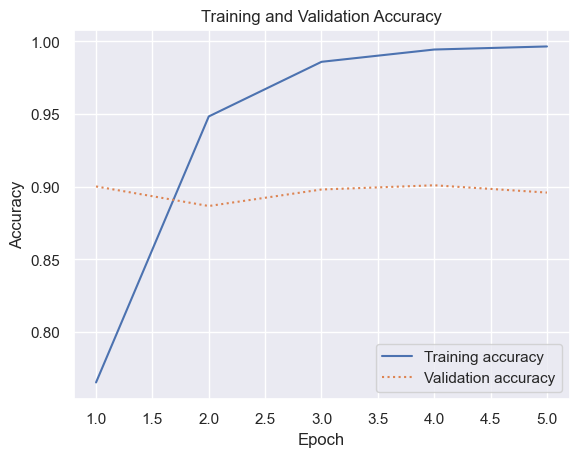

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set()
 
acc = hist.history['accuracy']
val = hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)
 
plt.plot(epochs, acc, '-', label='Training accuracy')
plt.plot(epochs, val, ':', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()

In [68]:

X_test = X_test.apply(lambda row: remove_stop_words(row['summary']), axis=1)
sequences = tokenizer.texts_to_sequences(X_test)
X_test = pad_sequences(sequences, maxlen=max_length)

test_loss, test_acc = model.evaluate(X_test, y_test, verbose=2)
print(f"Test accuracy: {test_acc}, Test loss: {test_loss}")

148/148 - 2s - 15ms/step - accuracy: 0.8977 - loss: 0.4900
Test accuracy: 0.8976744413375854, Test loss: 0.4900280237197876


In [111]:
# Assuming X_test is preprocessed and ready to be used
y_pred_probabilities = model.predict(X_test)
y_pred = np.argmax(y_pred_probabilities, axis=1)

148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step


In [112]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate classification report
report = classification_report(y_test, y_pred, target_names=['Left', 'Center', 'Right'])  # Adjust class names as necessary

print(f"Accuracy: {accuracy}\n")
print("Classification Report:")
print(report)

Accuracy: 0.8976744186046511

Classification Report:
              precision    recall  f1-score   support

        Left       0.95      0.96      0.96      2119
      Center       0.83      0.92      0.87      1427
       Right       0.89      0.76      0.82      1184

    accuracy                           0.90      4730
   macro avg       0.89      0.88      0.88      4730
weighted avg       0.90      0.90      0.90      4730



In [113]:
# Generate confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

print("Confusion Matrix:")
print(conf_mat)

Confusion Matrix:
[[2035   48   36]
 [  36 1317   74]
 [  60  230  894]]


The Convolutional Neural network model displays an accuracy of 90% for the testing set. This is a high metric specially given the small amount of training epochs. Below we further explore the strength of the model by testing it on articles that are not associated with the outelts considered for training and testing. We will use CNN and FOX news articles spread out over a 3 year period and see what the average classification is for batches of articles corresponding to different 3 month periods. 

In [98]:
CNN_articles = pd.read_csv('application_data/cnn.csv')
FOX_articles = pd.read_csv('application_data/foxnews.csv')

In [100]:
print(CNN_articles.columns)
print(FOX_articles.columns)

Index(['Unnamed: 0', 'title', 'published_date', 'clean_url', 'summary'], dtype='object')
Index(['Unnamed: 0', 'title', 'published_date', 'clean_url', 'summary'], dtype='object')


In [101]:
columns_to_drop = [ 'Unnamed: 0', 'title', 'clean_url']

CNN_articles.drop(columns=columns_to_drop, inplace=True)
CNN_articles = CNN_articles[CNN_articles['summary'].apply(type) == str]
print(CNN_articles.columns)

FOX_articles.drop(columns=columns_to_drop, inplace=True)
FOX_articles = FOX_articles[FOX_articles['summary'].apply(type) == str]
print(CNN_articles.columns)

Index(['published_date', 'summary'], dtype='object')
Index(['published_date', 'summary'], dtype='object')


In [80]:
# strip beggining and end of sentences as was done for training and testin data frames 
# The function below strips away the first three and last three sentences from every article. 
def strip_sentences(article):
    # Tokenize the article into sentences
    sentences = sent_tokenize(article)
    # Remove the first 3 and last 3 sentences
    stripped_sentences = sentences[3:-3]
    # Join the remaining sentences back into a single string
    return ' '.join(stripped_sentences)

In [102]:
CNN_articles['summary'] = CNN_articles['summary'].apply(strip_sentences)
FOX_articles['summary'] = FOX_articles['summary'].apply(strip_sentences)

In [95]:
def preprocess_text(texts, tokenizer, max_length):
    sequences = tokenizer.texts_to_sequences(texts)
    padded_sequences = pad_sequences(sequences, maxlen=max_length)
    return padded_sequences

In [121]:
def BiasDistributionOverTime2(CNN_articles, FOX_articles):
    def getAverages(articles):
        # Assuming CNN_articles is your DataFrame and it's already loaded
        articles['published_date'] = pd.to_datetime(articles['published_date'])
        # Generating three-month period labels
        articles['period'] = articles['published_date'].dt.to_period('Q')
        # Splitting the DataFrame based on these periods
        period_groups = articles.groupby('period')

        # Placeholder for average classification scores
        avg_scores = []

        for name, group in period_groups:
            group['summary'] = group['summary'].apply(remove_stop_words)
            # Preprocess summaries
            preprocessed_texts = preprocess_text(group['summary'], tokenizer, max_length)
            
            # Predict classes and calculate the average score
            predictions = model.predict(preprocessed_texts)
            predicted_classes = np.argmax(predictions, axis=1)
            
            # Calculate the mean of these predicted classes
            average_classification = predicted_classes.mean()

            avg_scores.append(average_classification)

        return avg_scores


    CNN_avg_scores = getAverages(CNN_articles)
    FOX_avg_scores = getAverages(FOX_articles)
    period_groups = CNN_articles.groupby('period')

    # graph average scores through time 
    # Period labels for the X-axis
    period_labels = [str(p) for p in period_groups.groups.keys()]

    plt.figure(figsize=(12, 6))
    # Set the y-axis to range from 0 to 2
    plt.ylim(0, 2)
    plt.plot(period_labels, CNN_avg_scores, marker='o', linestyle='-', label='CNN')
    plt.plot(period_labels, FOX_avg_scores, marker='o', linestyle='-', label='FOX')
    plt.legend()
    plt.xlabel('Three-Month Period')
    plt.ylabel('Average Classification Score')
    plt.title('Average Classification Score Over Time: CNN V.S FOX')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


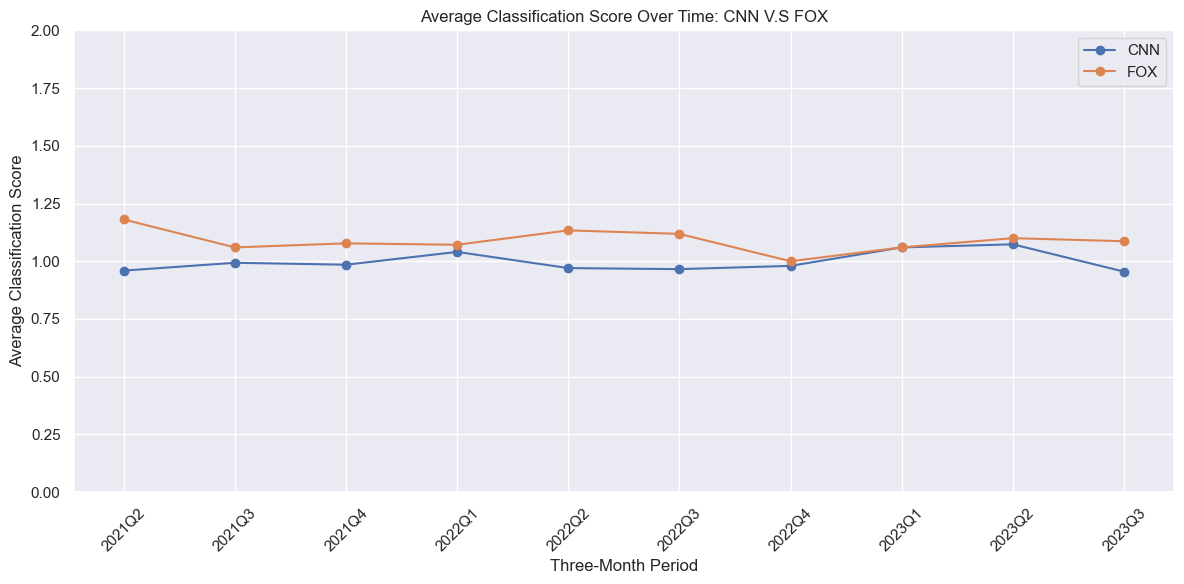

In [122]:
BiasDistributionOverTime2(CNN_articles, FOX_articles)